# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_2_ Plotting-Multiple-Data-Series/liquor_store_sales.csv')
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  
0              1.0             0.0  
1              1.0             0.0  
2              8.0             0.0  
3              2.0             0.0  
4              4.0             0.0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [22]:
item_counts=data.groupby("ItemType")[["RetailSales","RetailTransfers","WarehouseSales"]].agg("sum")
item_counts

RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            209763.11        234924.44      2437617.32
DUNNAGE              0.00             0.00       -45331.00
KEGS                 0.00             0.00        43558.00
LIQUOR          309847.85        334176.41        33173.32
NON-ALCOHOL       8109.97          9058.37         8656.72
REF                281.34           171.92        -6754.00
STR_SUPPLIES       995.98          3594.70            0.00
WINE            313400.42        340710.51       433009.47

<AxesSubplot:xlabel='ItemType'>

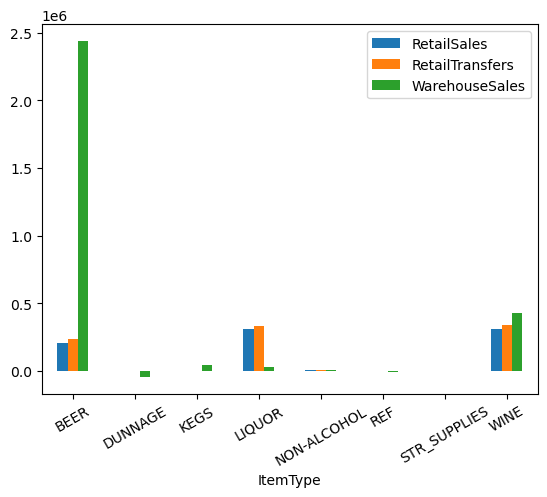

In [23]:
item_counts.plot(kind="bar",rot=30)


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [25]:
data["TotalSales"]=data["RetailSales"]+data["RetailTransfers"]+data["WarehouseSales"]

In [26]:
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  TotalSales  
0              1.0             0.0         1.0  
1              1.0             0.0         1.0  
2              8.0             0.0         8.0  
3              2.0             0.0         2.0  
4              4.0             0.0         4.0

In [28]:
data=data.groupby("Supplier").sum().sort_values("TotalSales",ascending=False)

In [34]:
data_test=data.head(10)
data_test

Year  Month  RetailSales  RetailTransfers  \
Supplier                                                                 
MILLER BREWING COMPANY    2602210   8980     35022.63         39176.67   
CROWN IMPORTS              812941   2800     26707.83         29561.67   
ANHEUSER BUSCH INC        4322888  15170     42559.14         47322.64   
HEINEKEN USA               982381   3412     20923.17         23004.25   
E & J GALLO WINERY        9418283  32124     67455.63         75129.83   
DIAGEO NORTH AMERICA INC  6723330  23122     57656.36         62968.12   
CONSTELLATION BRANDS      5751015  19663     54472.51         60542.10   
JIM BEAM BRANDS CO        5533195  18869     39156.79         43020.59   
THE WINE GROUP            3570439  12196     25758.15         28462.05   
BOSTON BEER CORPORATION   1061051   3692     10773.25         11869.96   

                          WarehouseSales  TotalSales  
Supplier                                              
MILLER BREWING COMPANY         572623.41   646822.71  
CROWN IMPORTS                  579824.70   636094.20  
ANHEUSER BUSCH INC             493856.19   583737.97  
HEINEKEN USA                   318812.59   362740.01  
E & J GALLO WINERY              75594.99   218180.45  
DIAGEO NORTH AMERICA INC        54252.88   174877.36  
CONSTELLATION BRANDS            44968.76   159983.37  
JIM BEAM BRANDS CO               2928.45    85105.83  
THE WINE GROUP                  26603.78    80823.98  
BOSTON BEER CORPORATION         53420.91    76064.12

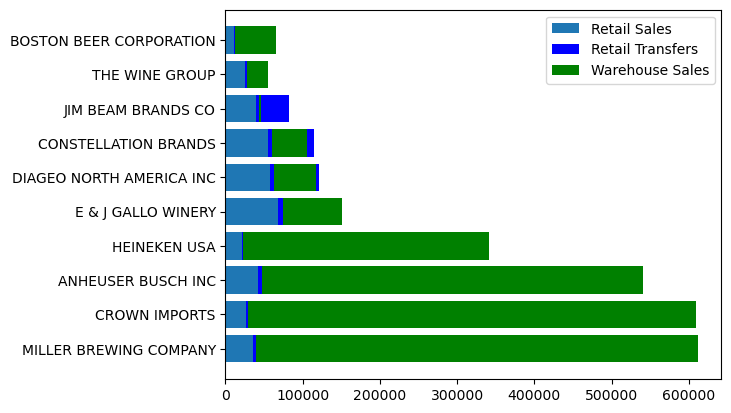

In [46]:

plt.barh(data_test.index,data_test["RetailSales"],label="Retail Sales")
plt.barh(data_test.index,data_test["RetailTransfers"], left = data_test["RetailSales"], label="Retail Transfers", color = "blue")
plt.barh(data_test.index,data_test["WarehouseSales"], left = data_test["RetailTransfers"], label="Warehouse Sales",color = "green")
plt.legend()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [5]:
data = pd.read_csv('/Users/clemence/IRONHACK/Labs-Ironhack/module_2/Lab_2_ Plotting-Multiple-Data-Series/liquor_store_sales.csv')
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  
0              1.0             0.0  
1              1.0             0.0  
2              8.0             0.0  
3              2.0             0.0  
4              4.0             0.0

In [6]:
mean_sales_month = data.groupby('Month')[["RetailSales","RetailTransfers","WarehouseSales"]].mean()
mean_sales_month

RetailSales  RetailTransfers  WarehouseSales
Month                                              
1         5.679413         5.574833       19.072137
2         5.939247         6.050136       20.229658
4         0.000000        15.707503        0.000000
5         7.038838         7.421817       27.310548
6         7.143914         6.950396       27.839069
8         6.409991         6.584726       28.122641
9         6.757254         6.419721       22.817909
10        6.549021         6.827827       22.289367
11        6.765496         7.103699       23.348862
12        9.078241         8.353759       21.169463

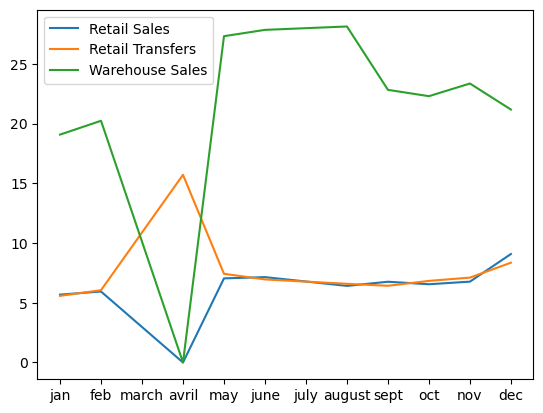

In [7]:
plt.plot(mean_sales_month.index,mean_sales_month["RetailSales"], label="Retail Sales")
plt.plot(mean_sales_month.index,mean_sales_month["RetailTransfers"], label="Retail Transfers")
plt.plot(mean_sales_month.index,mean_sales_month["WarehouseSales"],label="Warehouse Sales")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["jan","feb","march","avril","may","june","july","august","sept","oct","nov","dec"]) 
plt.legend()

## 4. Plot the same information as above but as a bar chart.

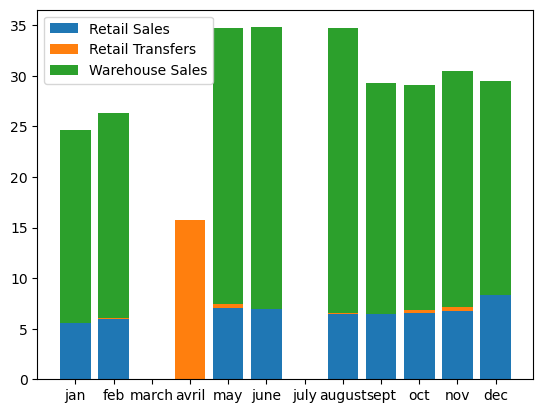

In [8]:
plt.bar(mean_sales_month.index,mean_sales_month["RetailSales"], label="Retail Sales")
plt.bar(mean_sales_month.index,mean_sales_month["RetailTransfers"], bottom= mean_sales_month["RetailSales"],label="Retail Transfers")
plt.bar(mean_sales_month.index,mean_sales_month["WarehouseSales"],bottom= mean_sales_month["RetailTransfers"],label="Warehouse Sales")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["jan","feb","march","avril","may","june","july","august","sept","oct","nov","dec"]) 
plt.legend()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [10]:
data["YearMonth"]= data["Year"].astype(str)+"-"+data["Month"].astype(str)


In [11]:
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales YearMonth  
0              1.0             0.0    2017-4  
1              1.0             0.0    2017-4  
2              8.0             0.0    2017-4  
3              2.0             0.0    2017-4  
4              4.0             0.0    2017-4

In [12]:
time=data.groupby(["YearMonth","ItemType"])["RetailSales"].sum().reset_index()

In [13]:
time["YearMonth"]=pd.to_datetime(time["YearMonth"])

In [14]:
time=pd.DataFrame(time)
time

YearMonth      ItemType  RetailSales
0  2017-10-01          BEER     22583.78
1  2017-10-01       DUNNAGE         0.00
2  2017-10-01          KEGS         0.00
3  2017-10-01        LIQUOR     32491.59
4  2017-10-01   NON-ALCOHOL       945.63
..        ...           ...          ...
68 2018-02-01        LIQUOR     28852.31
69 2018-02-01   NON-ALCOHOL       812.84
70 2018-02-01           REF        41.52
71 2018-02-01  STR_SUPPLIES        47.76
72 2018-02-01          WINE     29409.39

[73 rows x 3 columns]

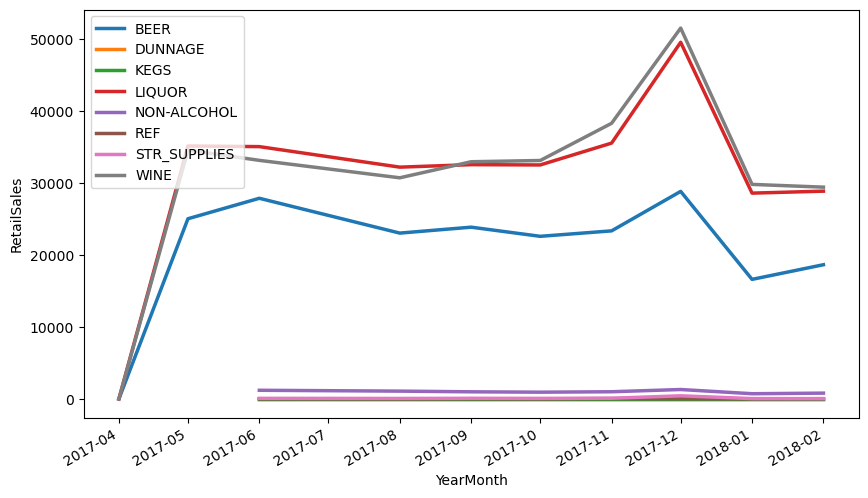

In [15]:
time= time.pivot(index='YearMonth', columns='ItemType', values='RetailSales')
time.plot(figsize=(10,6), linewidth=2.5)

plt.xlabel('YearMonth')
plt.ylabel('RetailSales')
plt.legend(loc='upper left')

plt.show()


## 6. Plot the same information as above but as a bar chart.

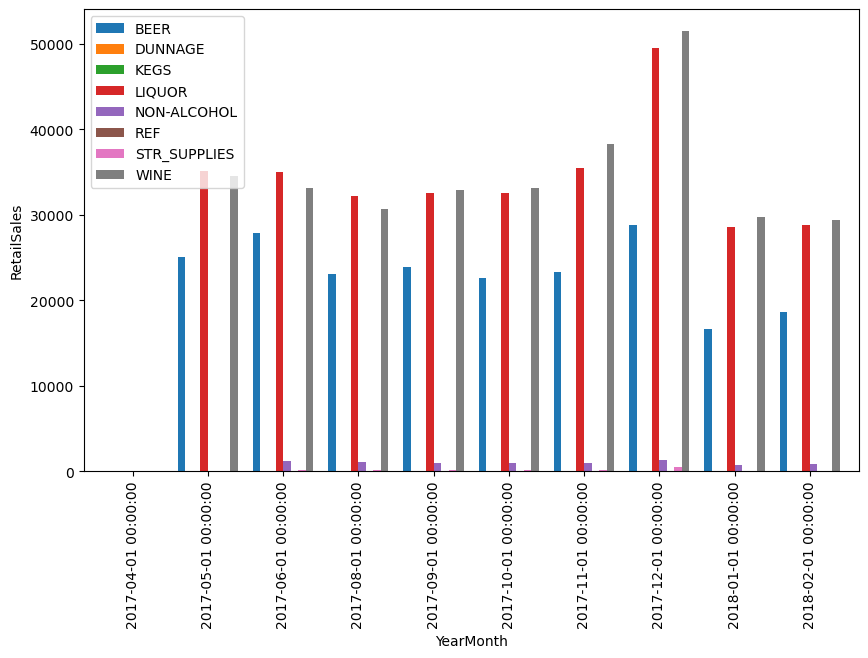

In [16]:
time.plot(kind='bar', figsize=(10,6), width=0.8)

plt.xlabel('YearMonth')
plt.ylabel('RetailSales')
plt.legend(loc='upper left')

plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

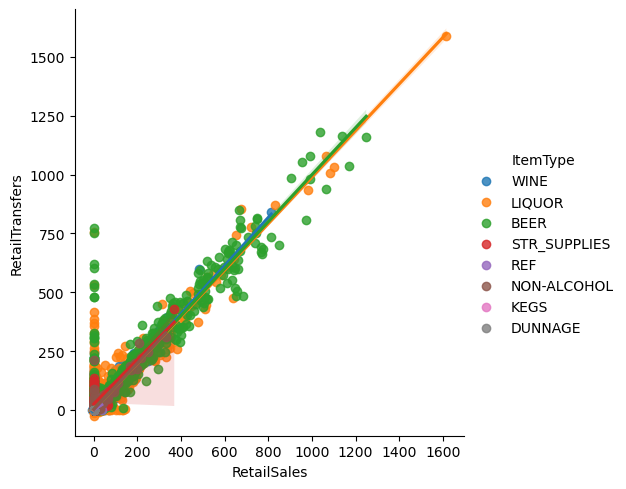

In [17]:
sns.lmplot(x='RetailSales', y='RetailTransfers', hue='ItemType', data=data)

plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

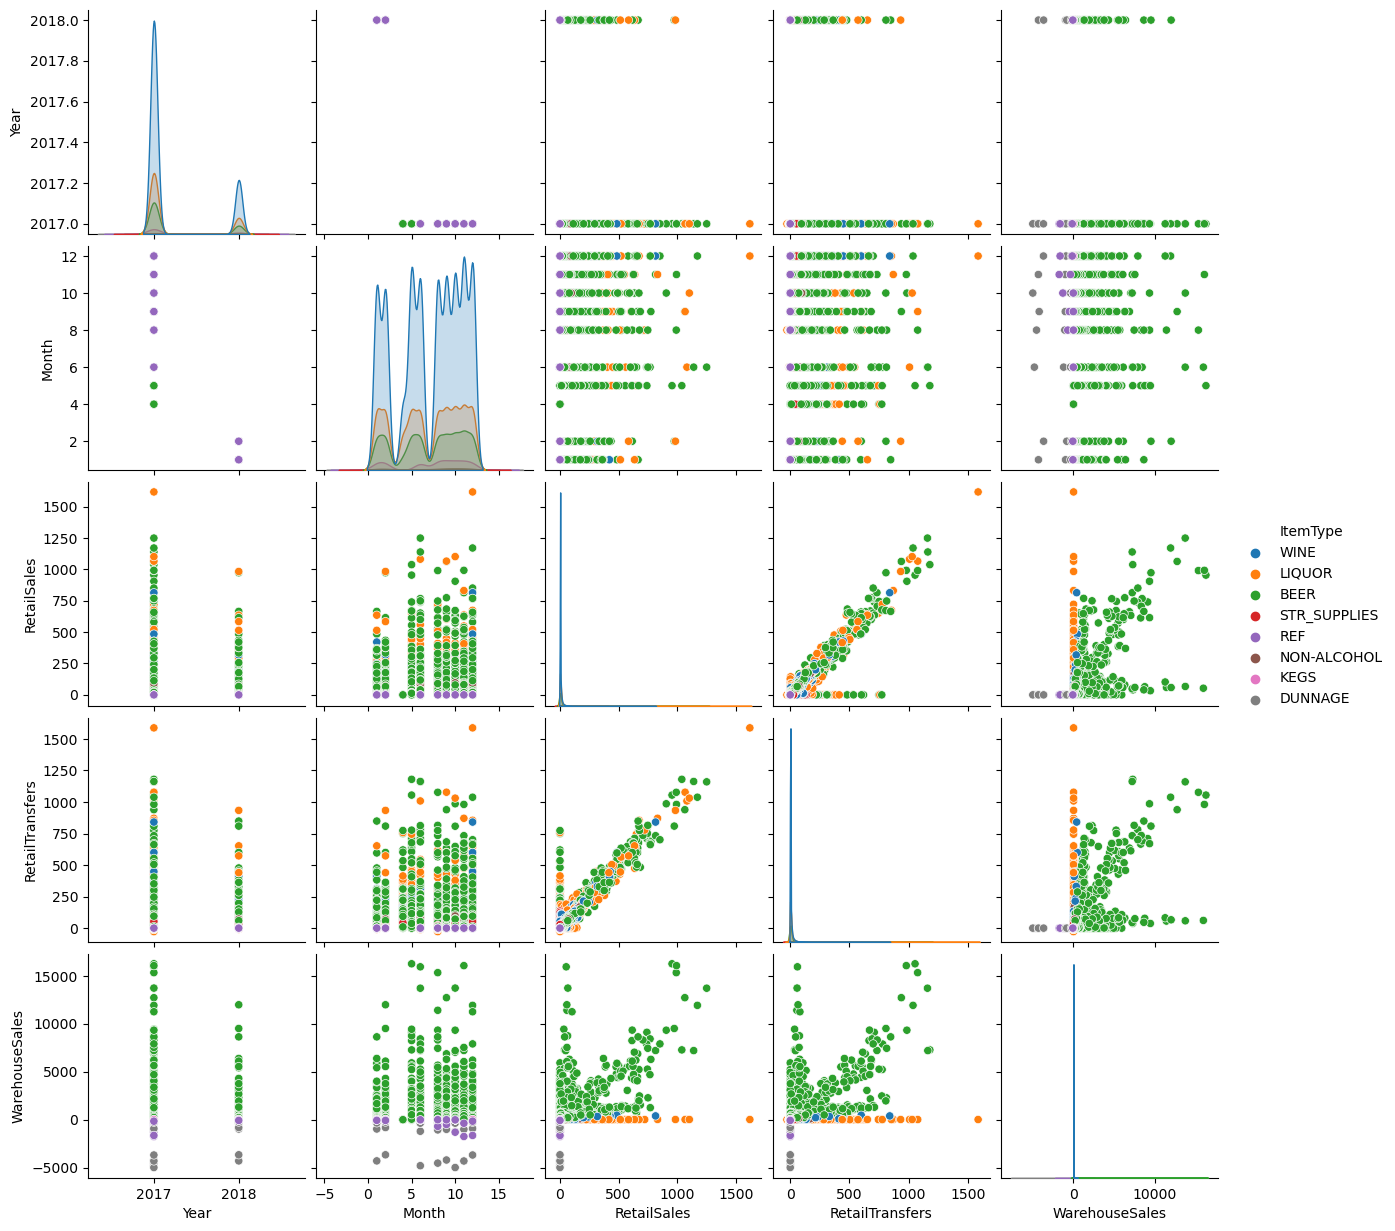

In [19]:
sns.pairplot(data, hue="ItemType")